In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset_b = sio.loadmat('HW9b.mat')

train_x_b = Dataset_b['train_X']
train_y_b = Dataset_b['train_y']
test_x_b = Dataset_b['test_X']
test_y_b = Dataset_b['test_y']

In [2]:

from sklearn.neural_network import MLPClassifier

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


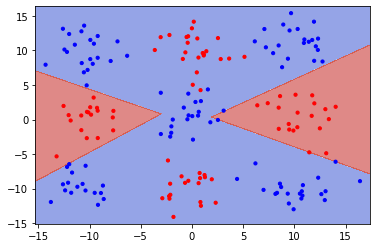

array([-1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,
       -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int16)

In [3]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(3, 2), random_state=1)
clf.fit(train_x_b, train_y_b.reshape(180))

X00, X11 = train_x_b[:,0], train_x_b[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

clf.predict(test_x_b)

In [4]:
X_train = train_x_b
y_train = train_y_b.reshape(-1)
X_test = test_x_b
y_test = test_y_b.reshape(-1)

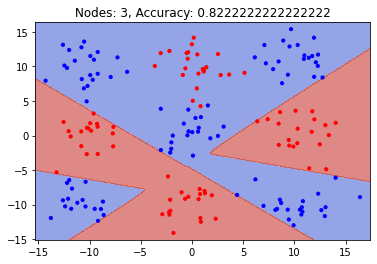

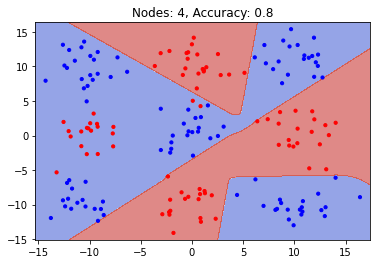

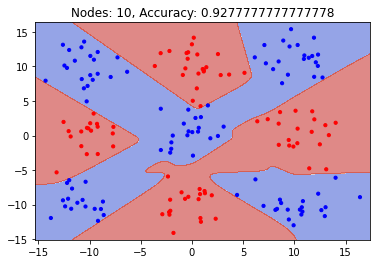

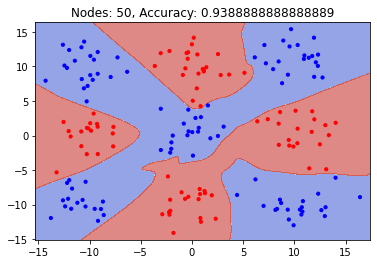

In [5]:
for num_nodes in [3,4,10,50]:
    clf = MLPClassifier(solver='lbfgs', alpha=1e-3, hidden_layer_sizes=(num_nodes,), random_state=1, activation='tanh',max_iter=1000)
    clf.fit(X_train, y_train)
    score = clf.score(X_test,y_test)
    
    X00, X11 = X_train[:,0], X_train[:,1]
    xx, yy = make_meshgrid(X00, X11)
    fig, ax= plt.subplots(1, 1)
    color= ['red' if l == 1 else 'blue' for l in train_y_b.reshape(180)]
    plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
    plt.title('Nodes: ' + str(num_nodes) + ', Accuracy: ' + str(score))
    plt.show()

We observe that the higher the number of input nodes, the higher the score on the test set. The neural netrwork was able to identify very well the areas of the different classes. Although, increasing the nodes will result to overfitting at some point (maybe we do not observe it at the moment but when a different test set will be evaluated the results might not be that great)